### List of all the packages we will use in this tutorial
* ggplot2 the star of the show
* ggpubr for showing multiple plots simultaneously
* gganimate for when we want to animate our figures
    * gifski is an additional package to enable rendering of our gifs
* scales to make our labels in our plots look nicer
* rgdal for loading in shapefiles to make our spatial plots
* dplyr for working with the data through pipelines, mutations, and summarization

In [1]:
### if you need to install anything
# install.packages("", repo = "https://cloud.r-project.org/")

In [2]:
### These are all the packages we must call up
library(ggplot2) # for plotting
library(ggpubr) # for showing multiple plots simultaneously
library(gganimate) # for animating our figures
library(scales) # for changing numbers from 6e6 to 6,000,000
library(rgdal) # for loading in spatial data
library(dplyr) # for working with data

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Warning message:
"package 'ggpubr' was built under R version 3.6.3"Warning message:
"package 'gganimate' was built under R version 3.6.3"Warning message:
"package 'scales' was built under R version 3.6.3"Warning message:
"package 'rgdal' was built under R version 3.6.3"Loading required package: sp
Warning message:
"package 'sp' was built under R version 3.6.3"rgdal: version: 1.5-10, (SVN revision 1006)
Geospatial Data Abstraction Library extensions to R successfully loaded
Loaded GDAL runtime: GDAL 3.0.4, released 2020/01/28
Path to GDAL shared files: C:/Users/Jason/Documents/R/win-library/3.6/rgdal/gdal
GDAL binary built with GEOS: TRUE 
Loaded PROJ runtime: Rel. 6.3.1, February 10th, 2020, [PJ_VERSION: 631]
Path to PROJ shared files: C:/Users/Jason/Documents/R/win-library/3.6/rgdal/proj
Linking to sp version:1.4-2
To mute warnings of possible GDA

## Preparing the data

Our objective is to turn the raw COVID data into a usable data frame from which we can develop interpretable visualizations. We will supplement this dataset with a demographic dataset for each state obtained from the American Community Survey (ACS). The final datasets created from the raw datasets will be distributed, and the following code is to show how they were created. This is where we use the 'dplyr' package. Here is a quick rundown of the steps taken to create the final data frames.

1. Load in all the data and inspect it to see what we're working with
2. Summarize and create new variables/columns using the 'dplyr' package
3. Merge appropriate datasets
4. Write new datasets into a new file so we do not have to repeat this code

#### States dataset procured from the American Community Survey

In [3]:
setwd("G:/My Drive/Desktop Laptop Shared Files/ggplot2 seminar/data_files/raw_data")
acs_data = read.csv("acs_us_states.csv")

In [4]:
head(acs_data)

state_acronym state      state_fips pop_total pop_white edu_total edu_hs 
1 AL            Alabama    1           4876250   3320247   3320877   841716
2 AK            Alaska     2            737068    476015    480586   108797
3 AZ            Arizona    4           7050299   5444453   4732532   940168
4 AR            Arkansas   5           2999370   2301044   2011639   559816
5 CA            California 6          39283497  23453222  26471543  4813250
6 CO            Colorado   8           5610349   4712574   3825579   667781
  edu_ged edu_bachelors edu_masters edu_profschool edu_phd income_per_capita
1 181123   529178        230528      50270          35796  27928            
2  25785    88058         37958      10373           5630  36787            
3 188961   869452        378467      86371          60236  30694            
4 124843   297250        119000      27707          19279  26577            
5 610212  5603047       2294771     645797         437111  36955            
6 149671   981017        428252      90525          65340  38226            
  pop_wo_healthcare
1  457826          
2   97156          
3  723547          
4  250631          
5 2915070          
6  420782

In [5]:
tail(acs_data)

state_acronym state         state_fips pop_total pop_white edu_total edu_hs 
47 VA            Virginia      51         8454463   5717617   5776886   1155096
48 WA            Washington    53         7404107   5581128   5101624    925707
49 WV            West Virginia 54         1817305   1691600   1287427    432826
50 WI            Wisconsin     55         5790716   4946961   3955705   1073887
51 WY            Wyoming       56          581024    531304    390516     93507
52 PR            Puerto Rico   72         3318447   2188014   2345959    597482
   edu_ged edu_bachelors edu_masters edu_profschool edu_phd income_per_capita
47 228673  1272608       711810      147534         108408  39278            
48 196623  1144545       497712      113613          81742  38915            
49  86265   159196        77953       16224          12025  26480            
50 138094   780824       294273       68736          47496  33375            
51  20028    68269        28366        5748           4472  33366            
52  58198   433178       119364       28049          26292  12914            
   pop_wo_healthcare
47 707960           
48 457854           
49 108019           
50 310259           
51  65354           
52 215827

In [6]:
summary(acs_data)

 state_acronym        state      state_fips      pop_total       
 AK     : 1    Alabama   : 1   Min.   : 1.00   Min.   :  581024  
 AL     : 1    Alaska    : 1   1st Qu.:16.75   1st Qu.: 1792416  
 AR     : 1    Arizona   : 1   Median :29.50   Median : 4289428  
 AZ     : 1    Arkansas  : 1   Mean   :29.79   Mean   : 6308005  
 CA     : 1    California: 1   3rd Qu.:42.50   3rd Qu.: 7138751  
 CO     : 1    Colorado  : 1   Max.   :72.00   Max.   :39283497  
 (Other):46    (Other)   :46                                     
   pop_white          edu_total            edu_hs           edu_ged      
 Min.   :  285857   Min.   :  390516   Min.   :  70065   Min.   : 13120  
 1st Qu.: 1560377   1st Qu.: 1217158   1st Qu.: 277423   1st Qu.: 52522  
 Median : 3106261   Median : 2959022   Median : 674264   Median :127263  
 Mean   : 4568571   Mean   : 4287847   Mean   : 987371   Mean   :168945  
 3rd Qu.: 5560325   3rd Qu.: 4861668   3rd Qu.:1167187   3rd Qu.:207697  
 Max.   :23453222   Max.   :

#### Summarizing the ACS data

In [7]:
### the ACS data are already in a good structure
### so we don't have to do anything fancy to it like we did with the COVID data
acs_data = (acs_data %>% 
            mutate(# finding percent minority
                   percent_minority = 100 * (pop_total - pop_white) / pop_total,
                   # dummy variable indicating if state is in top half of minority pop
                   top_half_minority = as.integer(median(percent_minority) < percent_minority),
                   # finding percent of population with at least a bachelor's degree
                   percent_bachelors = 100 * (edu_bachelors + edu_masters + edu_profschool + edu_phd) / edu_total,
                   # dummy variable indicating if state is in top half of edu pop
                   top_half_edu = as.integer(median(percent_bachelors) < percent_bachelors),
                   # finding percent of population without healthcare
                   percent_healthcare = 100 * (pop_total - pop_wo_healthcare) / pop_total,
                   # dummy variable indicating if state is in top half of healthcare
                   top_half_healthcare = as.integer(median(percent_healthcare) < percent_healthcare))
            )

# check to see if it worked properly
head(acs_data)

state_acronym state      state_fips pop_total pop_white edu_total edu_hs 
1 AL            Alabama    1           4876250   3320247   3320877   841716
2 AK            Alaska     2            737068    476015    480586   108797
3 AZ            Arizona    4           7050299   5444453   4732532   940168
4 AR            Arkansas   5           2999370   2301044   2011639   559816
5 CA            California 6          39283497  23453222  26471543  4813250
6 CO            Colorado   8           5610349   4712574   3825579   667781
  edu_ged edu_bachelors edu_masters edu_profschool edu_phd income_per_capita
1 181123   529178        230528      50270          35796  27928            
2  25785    88058         37958      10373           5630  36787            
3 188961   869452        378467      86371          60236  30694            
4 124843   297250        119000      27707          19279  26577            
5 610212  5603047       2294771     645797         437111  36955            
6 149671   981017        428252      90525          65340  38226            
  pop_wo_healthcare percent_minority top_half_minority percent_bachelors
1  457826           31.90983         1                 25.46833         
2   97156           35.41776         1                 29.55121         
3  723547           22.77699         1                 29.46681         
4  250631           23.28242         1                 23.02779         
5 2915070           40.29752         1                 33.92596         
6  420782           16.00212         0                 40.91234         
  top_half_edu percent_healthcare top_half_healthcare
1 0            90.61110           0                  
2 0            86.81858           0                  
3 0            89.73736           0                  
4 0            91.64388           0                  
5 1            92.57940           1                  
6 1            92.49990           1

#### COVID dataset

Important things to note
* The data are aggregated to the state level
* It is updated fairly often
* The data for cases and deaths are cumulative

In [8]:
### loading in the COVID dataset
### setwd changes the default folder that R will use to look for files
### alternatively, you can you just put the entire destination + file name into read.csv()
setwd("G:/My Drive/Desktop Laptop Shared Files/ggplot2 seminar/data_files/raw_data")
covid_data = read.csv("covid_us_states.csv")

In [9]:
### what does the top few rows of the data look like?
head(covid_data)

date       state      fips cases deaths
1 2020-01-21 Washington 53   1     0     
2 2020-01-22 Washington 53   1     0     
3 2020-01-23 Washington 53   1     0     
4 2020-01-24 Illinois   17   1     0     
5 2020-01-24 Washington 53   1     0     
6 2020-01-25 California  6   1     0

In [10]:
### what does the bottom few rows of the data look like?
tail(covid_data)

date       state          fips cases  deaths
32929 2021-10-21 Virgin Islands 78     7099    78 
32930 2021-10-21 Virginia       51   913100 13624 
32931 2021-10-21 Washington     53   710571  8475 
32932 2021-10-21 West Virginia  54   264002  4238 
32933 2021-10-21 Wisconsin      55   865319  9226 
32934 2021-10-21 Wyoming        56    99662  1149

In [11]:
### quick summary statistics of the data
summary(covid_data)

         date                 state            fips           cases        
 2021-09-22:   56   Washington   :  640   Min.   : 1.00   Min.   :      1  
 2021-09-23:   56   Illinois     :  637   1st Qu.:17.00   1st Qu.:  18972  
 2021-09-24:   56   California   :  636   Median :31.00   Median : 120998  
 2021-09-25:   56   Arizona      :  635   Mean   :31.99   Mean   : 349384  
 2021-09-26:   56   Massachusetts:  629   3rd Qu.:46.00   3rd Qu.: 444153  
 2021-09-27:   56   Wisconsin    :  625   Max.   :78.00   Max.   :4860797  
 (Other)   :32598   (Other)      :29132                                    
     deaths     
 Min.   :    0  
 1st Qu.:  404  
 Median : 2218  
 Mean   : 6533  
 3rd Qu.: 7746  
 Max.   :71369  
                

#### Summarizing the COVID data

In [12]:
### before working with all the data,
### lets add a few columns that will make the df easier to work with
# but first lets convert the date column which is of class factor to a string
covid_data$date = as.character(covid_data$date) # as.character() converts the input into a string

# extracting the year
covid_data$year = as.integer(substr(covid_data$date, 1, 4)) # as.integer() converts the input into an integer
                                                            # substr() extracts the characters between
                                                            # the beginning and ending position index

# extracting the month
covid_data$month = as.integer(substr(covid_data$date, 6, 7))

head(covid_data)

date       state      fips cases deaths year month
1 2020-01-21 Washington 53   1     0      2020 1    
2 2020-01-22 Washington 53   1     0      2020 1    
3 2020-01-23 Washington 53   1     0      2020 1    
4 2020-01-24 Illinois   17   1     0      2020 1    
5 2020-01-24 Washington 53   1     0      2020 1    
6 2020-01-25 California  6   1     0      2020 1

In [13]:
### now with year and month, we can summarize the data properly
### because the number of cases and deaths in this data are cumulative,
### let's find the max case and deaths within each month
### we can use the last day of the month to find the number,
### but max() streamlines the process
covid_state_month = (covid_data %>%
                     group_by(state, year, month) %>%
                     summarize(fips = fips[1], # keeps the fips code for merging later
                               months_after_jan20 = (((year == 2021)*12) + month)[1],
                               cases_total = max(cases),
                               deaths_total = max(deaths))
                    )

# a quick check to see what we just produced
head(covid_state_month)

state   year month fips months_after_jan20 cases_total deaths_total
1 Alabama 2020 3     1    3                     999        14        
2 Alabama 2020 4     1    4                    7068       272        
3 Alabama 2020 5     1    5                   17952       630        
4 Alabama 2020 6     1    6                   38045       950        
5 Alabama 2020 7     1    7                   87723      1580        
6 Alabama 2020 8     1    8                  126058      2182

In [14]:
### lets remove the rows/states from the COVID dataset
### that aren't in the ACS data
### this should take out American Samoa, Virgin Islands, etc
covid_state_month = covid_state_month[which(covid_state_month$state %in% unique(acs_data$state)), ]

In [15]:
### because there are multiple states which do not appear in the first few months of 2020
### we will append the missing months with values of 0 for cases and deaths
### unfortunately, I am lazy and did this in a for loop rather than something more elegant
states_list = unique(covid_state_month$state)
for(i in 1:length(states_list)) {
    state_of_interest = states_list[i]
    temp_df = covid_state_month[which((covid_state_month$state == state_of_interest) &
                                      (covid_state_month$year == 2020)), ]
    first_month = min(temp_df$month)
    fips_code = temp_df$fips[1]
    
    if(first_month != 1) {
        ### finding number of missing months
        num_missing_months = first_month - 1
        
        ### creating vectors that will be used to define the
        ### new dataframe we are appending to the original
        state_name = rep(state_of_interest, num_missing_months)
        years = rep(2020, num_missing_months)
        months = 1:num_missing_months
        state_fips = rep(fips_code, num_missing_months)
        months_after = 1:num_missing_months
        cases = rep(0, num_missing_months)
        deaths = rep(0, num_missing_months)
        
        new_df = data.frame(state = state_name,
                            year = years,
                            month = months,
                            fips = state_fips,
                            months_after_jan20 = months_after,
                            cases_total = cases,
                            deaths_total = deaths)
        
        ### i did bind_rows because rbind did something weird
        ### since the dplyr created data frame covid_state_month
        ### isn't just of class data.frame, so it was returning
        ### something wonky and ugly
        covid_state_month = bind_rows(covid_state_month, new_df)
    }
}

In [16]:
### our appended rows will appear at the bottom of the new data frame
### check it to see that they look correct
### you can sort them later
tail(covid_state_month)

state         year month fips months_after_jan20 cases_total deaths_total
1 Virginia      2020 2     51   2                  0           0           
2 West Virginia 2020 1     54   1                  0           0           
3 West Virginia 2020 2     54   2                  0           0           
4 Wisconsin     2020 1     55   1                  0           0           
5 Wyoming       2020 1     56   1                  0           0           
6 Wyoming       2020 2     56   2                  0           0

In [17]:
### rather than cases and deaths by month, we will look at the
### most recent total counts for COVID for each state
covid_state_total = (covid_state_month %>%
                     group_by(state) %>%
                     summarize(state_fips = fips[1],
                               cases = max(cases_total),
                               deaths = max(deaths_total))
                     )

head(covid_state_total)

state      state_fips cases   deaths
1 Alabama    1           817054 15320 
2 Alaska     2           131547   674 
3 Arizona    4          1142122 20776 
4 Arkansas   5           508937  8237 
5 California 6          4860797 71369 
6 Colorado   8           721073  8174

In [18]:
### while we're at it lets look at numbers aggregated to the entire U.S.
covid_usa_summarized = (covid_state_month %>%
                        group_by(year, month) %>%
                        summarize(months_after_jan20 = (((year == 2021)*12) + month)[1],
                                  cases_total_nation = sum(cases_total),
                                  deaths_total_nation = sum(deaths_total)))

covid_usa_summarized

### we will write this into a new csv for use later
setwd("G:/My Drive/Desktop Laptop Shared Files/ggplot2 seminar/data_files/processed_data")
write.csv(covid_usa_summarized, "covid_usa.csv", row.names = F)

year month months_after_jan20 cases_total_nation deaths_total_nation
1  2020  1     1                        7                0             
2  2020  2     2                       70                1             
3  2020  3     3                   188290             4302             
4  2020  4     4                  1074561            63128             
5  2020  5     5                  1798066           104365             
6  2020  6     6                  2651973           127489             
7  2020  7     7                  4569896           153852             
8  2020  8     8                  6041898           183454             
9  2020  9     9                  7257890           206780             
10 2020 10    10                  9201889           230409             
11 2020 11    11                 13605850           267893             
12 2020 12    12                 20014362           345902             
13 2021  1    13                 26210345           441143             
14 2021  2    14                 28612667           512996             
15 2021  3    15                 30467044           551495             
16 2021  4    16                 32350821           575613             
17 2021  5    17                 33265162           594152             
18 2021  6    18                 33628391           604273             
19 2021  7    19                 35004345           612737             
20 2021  8    20                 39298996           640314             
21 2021  9    21                 43435031           697717             
22 2021 10    22                 45263358           733077

#### Combining COVID and ACS data

In [19]:
### here is where we combine all the ACS and cumulative covid data
### we assign the covid data frame to the x input for the merge() function
### by.x is stating that we want to use the "state_fips" column to match with the acs data
### all.x is stating that we want to maintain all the rows in the covid data
### if there is a row that does not match with the other data frame,
### the missing values will appear as NA
### we are merging with the ACS data which we assign to y
### we remove columns 'state_acronym' and 'state' from the dataset so it's not
### duplicated in the merged dataset
### if a row in the ACS data cannot be matched with one from the COVID data,
### we do not include that row in the merged dataset by saying 'all.y = F'
covid_state = merge(x = covid_state_total,
                    by.x = "state_fips", all.x = T,
                    y = acs_data[, -which(names(acs_data) %in% c("state_acronym", "state"))],
                    by.y = "state_fips", all.y = F)

### this is to normalize the data into something more comparable
### each state has different populations,
### so comparing the number of cases and deaths is not very useful
### therefore, cases and deaths are normalized to a per 100,000 basis
covid_state$cases_per_100000 = 100000 * (covid_state$cases / covid_state$pop_total)
covid_state$deaths_per_100000 = 100000 * (covid_state$deaths / covid_state$pop_total)

head(covid_state)

### writing the data into a new csv
setwd("G:/My Drive/Desktop Laptop Shared Files/ggplot2 seminar/data_files/processed_data")
write.csv(covid_state, "covid_bystate.csv", row.names = F)

state_fips state      cases   deaths pop_total pop_white edu_total edu_hs 
1 1          Alabama     817054 15320   4876250   3320247   3320877   841716
2 2          Alaska      131547   674    737068    476015    480586   108797
3 4          Arizona    1142122 20776   7050299   5444453   4732532   940168
4 5          Arkansas    508937  8237   2999370   2301044   2011639   559816
5 6          California 4860797 71369  39283497  23453222  26471543  4813250
6 8          Colorado    721073  8174   5610349   4712574   3825579   667781
  edu_ged edu_bachelors ... income_per_capita pop_wo_healthcare
1 181123   529178       ... 27928              457826          
2  25785    88058       ... 36787               97156          
3 188961   869452       ... 30694              723547          
4 124843   297250       ... 26577              250631          
5 610212  5603047       ... 36955             2915070          
6 149671   981017       ... 38226              420782          
  percent_minority top_half_minority percent_bachelors top_half_edu
1 31.90983         1                 25.46833          0           
2 35.41776         1                 29.55121          0           
3 22.77699         1                 29.46681          0           
4 23.28242         1                 23.02779          0           
5 40.29752         1                 33.92596          1           
6 16.00212         0                 40.91234          1           
  percent_healthcare top_half_healthcare cases_per_100000 deaths_per_100000
1 90.61110           0                   16755.79         314.17585        
2 86.81858           0                   17847.34          91.44339        
3 89.73736           0                   16199.63         294.68254        
4 91.64388           0                   16968.13         274.62434        
5 92.57940           1                   12373.64         181.67680        
6 92.49990           1                   12852.55         145.69504

In [20]:
### we can do the exact same that we did for above with the monthly counts
covid_state_test = merge(x = covid_state_month,
                         by.x = "fips", all.x = T,
                         y = acs_data[, -which(names(acs_data) %in% c("state"))],
                         by.y = "state_fips", all.y = F)

covid_state_test$cases_per_100000 = 100000 * (covid_state_test$cases / covid_state_test$pop_total)
covid_state_test$deaths_per_100000 = 100000 * (covid_state_test$deaths / covid_state_test$pop_total)

covid_state_test = covid_state_test[with(covid_state_test, order(state, months_after_jan20)), ]
head(covid_state_test)
names(covid_state_test)

important_columns = c("fips", "state", "year", "months_after_jan20", "cases_total", "deaths_total",
                      "pop_total", "cases_per_100000", "deaths_per_100000")
covid_state_test = covid_state_test[, which(names(covid_state_test) %in% important_columns)]

setwd("G:/My Drive/Desktop Laptop Shared Files/ggplot2 seminar/data_files/processed_data")
write.csv(covid_state_test, "covid_bystate_bymonth.csv", row.names = F)

fips state   year month months_after_jan20 cases_total deaths_total
22 1    Alabama 2020 1     1                      0         0         
21 1    Alabama 2020 2     2                      0         0         
1  1    Alabama 2020 3     3                    999        14         
2  1    Alabama 2020 4     4                   7068       272         
3  1    Alabama 2020 5     5                  17952       630         
4  1    Alabama 2020 6     6                  38045       950         
   state_acronym pop_total pop_white ... income_per_capita pop_wo_healthcare
22 AL            4876250   3320247   ... 27928             457826           
21 AL            4876250   3320247   ... 27928             457826           
1  AL            4876250   3320247   ... 27928             457826           
2  AL            4876250   3320247   ... 27928             457826           
3  AL            4876250   3320247   ... 27928             457826           
4  AL            4876250   3320247   ... 27928             457826           
   percent_minority top_half_minority percent_bachelors top_half_edu
22 31.90983         1                 25.46833          0           
21 31.90983         1                 25.46833          0           
1  31.90983         1                 25.46833          0           
2  31.90983         1                 25.46833          0           
3  31.90983         1                 25.46833          0           
4  31.90983         1                 25.46833          0           
   percent_healthcare top_half_healthcare cases_per_100000 deaths_per_100000
22 90.6111            0                     0.00000         0.0000000       
21 90.6111            0                     0.00000         0.0000000       
1  90.6111            0                    20.48705         0.2871059       
2  90.6111            0                   144.94745         5.5780569       
3  90.6111            0                   368.15176        12.9197642       
4  90.6111            0                   780.21020        19.4821841

[1] "fips"                "state"               "year"               
 [4] "month"               "months_after_jan20"  "cases_total"        
 [7] "deaths_total"        "state_acronym"       "pop_total"          
[10] "pop_white"           "edu_total"           "edu_hs"             
[13] "edu_ged"             "edu_bachelors"       "edu_masters"        
[16] "edu_profschool"      "edu_phd"             "income_per_capita"  
[19] "pop_wo_healthcare"   "percent_minority"    "top_half_minority"  
[22] "percent_bachelors"   "top_half_edu"        "percent_healthcare" 
[25] "top_half_healthcare" "cases_per_100000"    "deaths_per_100000"

## Time for plotting

We begin this portion by reading in the datasets that combine COVID and ACS data. These are the data frames that are created with the code used above. We will cover important aspects of scatter, line, box, bar, histogram, and density plots. These are typically the plots you start with to do a preliminary analysis of your data. Of course, there are other types of plots that can be created using ggplot2. The concepts presented in the following code can be applied to plots not listed here.

In [21]:
setwd("G:/My Drive/Desktop Laptop Shared Files/ggplot2 seminar/data_files/processed_data")
covid_bystate = read.csv("covid_bystate.csv")
covid_bystate_bymonth = read.csv("covid_bystate_bymonth.csv")
covid_usa = read.csv("covid_usa.csv")

#### Scatter Plots

One of the more simpler plots, scatter plots are used when you have continuous X and Y variables. For this example we will look at the most recent COVID cumulative tally of cases and deaths against some ACS variables.

* Data: covid_bystate
* Variables: percent_bachelors, cases_per_100000, top_half_edu

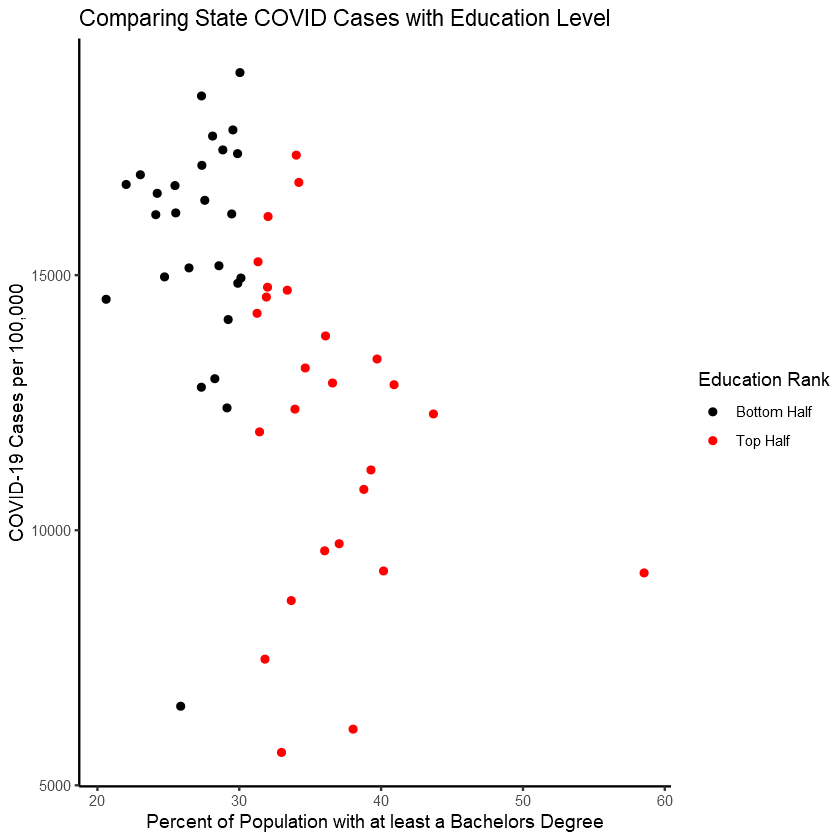

In [22]:
### cases vs percent of state population with at least a bachelor's degree
scatter_edu = 
ggplot() +
geom_point(data = covid_bystate, aes(x = percent_bachelors, y = cases_per_100000, color = factor(top_half_edu))) +
labs(title = "Comparing State COVID Cases with Education Level",
     y = "COVID-19 Cases per 100,000",
     x = "Percent of Population with at least a Bachelors Degree",
     color = "Education Rank") +
scale_color_manual(labels = c("Bottom Half", "Top Half"), values = c("0" = "black", "1" = "red")) +
theme_classic()

scatter_edu

#### Line Plots

Similar to the scatter plot, line plots are great when you have data organized into a series. In this example, we will be looking at total COVID cases in the United States through time.

* Data: covid_usa
* Variables: months_after_jan20, cases_total_nation

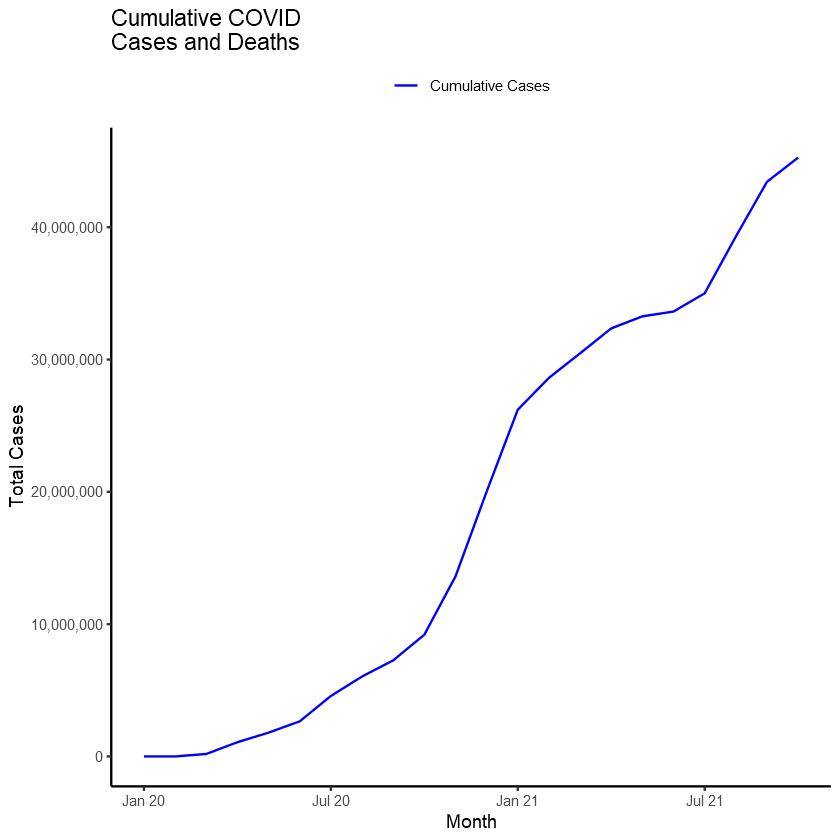

In [23]:
cases_over_time = 
ggplot(data = covid_usa) +
geom_line(aes(x = months_after_jan20, y = cases_total_nation, color = "Cumulative Cases")) + 
scale_color_manual(name = "", values = c("Cumulative Cases" = "blue")) +
theme_classic() +
theme(legend.position = "top") +
scale_y_continuous(labels = scales::comma,
                   "Total Cases") +
scale_x_continuous("Month",
                   breaks = c(1, 7, 13, 19),
                   labels = c("Jan 20", "Jul 20", "Jan 21", "Jul 21")) + 
ggtitle("Cumulative COVID\nCases and Deaths")
                   

cases_over_time

#### Box (and Whiskers) Plots

With box plots, we are trying to visualize the distribution of data. The box in the box plot itself shows three values: the 25th percentile, median, and 75th percentile. The Interquartile range (IQR) is the difference between the 75th and 25th percentiles. The "whiskers" of the plots are the 25th and 75th percentiles -/+ (1.5\*IQR), respectively. Points outside of the "whiskers" bounds are considered outliers.

* Data: covid_bystate
* Variables: cases_per_100000, top_half_edu

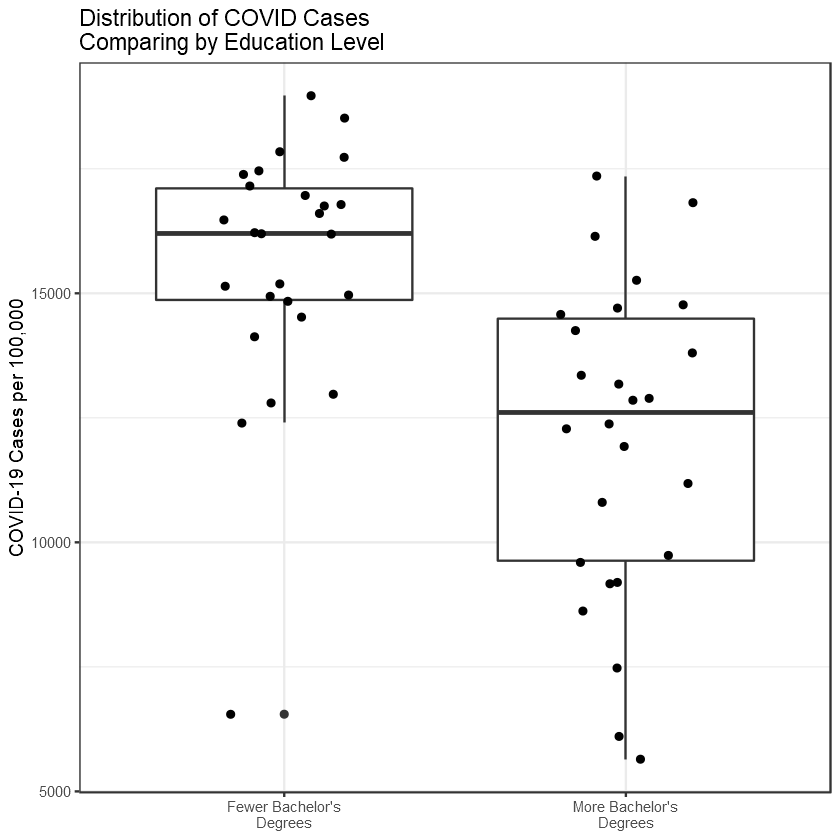

In [24]:
box_edu = 
ggplot() +
geom_boxplot(data = covid_bystate, aes(y = cases_per_100000, x = factor(top_half_edu))) +
labs(title = "Distribution of COVID Cases\nComparing by Education Level",
     x = NULL,
     y = "COVID-19 Cases per 100,000") +
scale_x_discrete(labels = c("Fewer Bachelor\'s\nDegrees", "More Bachelor\'s\nDegrees")) +
geom_jitter(data = covid_bystate, aes(y = cases_per_100000, x = factor(top_half_edu)),
            position = position_jitter(width = 0.2)) +
theme_bw()

box_edu

#### Bar plots

Bar plots are for when we want to visualize differences between discrete cases. In our analysis, we are trying to see differences between states whose share of population with at least a Bachelor's degree are in the top half against those who are in the bottom half. We will use the average cases per 100,000 people to compare them. We will also find the standard deviation and plot it to quickly see if they really are that different from each other.

* Data: covid_bystate, covid_bystate_summarized
* Variables: cases_per_100000, average_cases_per_100000, sd_cases_per_100000

In [25]:
### the data summarization for showing the first way
### in this way, we are defining the height of the bars
names(covid_bystate)
covid_bystate_summarized = (covid_bystate %>%
                            group_by(top_half_edu) %>%
                            summarize(average_cases_per_100000 = mean(cases_per_100000),
                                      sd_cases_per_100000 = sd(cases_per_100000)))

covid_bystate_summarized

[1] "state_fips"          "state"               "cases"              
 [4] "deaths"              "pop_total"           "pop_white"          
 [7] "edu_total"           "edu_hs"              "edu_ged"            
[10] "edu_bachelors"       "edu_masters"         "edu_profschool"     
[13] "edu_phd"             "income_per_capita"   "pop_wo_healthcare"  
[16] "percent_minority"    "top_half_minority"   "percent_bachelors"  
[19] "top_half_edu"        "percent_healthcare"  "top_half_healthcare"
[22] "cases_per_100000"    "deaths_per_100000"

top_half_edu average_cases_per_100000 sd_cases_per_100000
1 0            15603.12                 2512.952           
2 1            12079.31                 3164.842

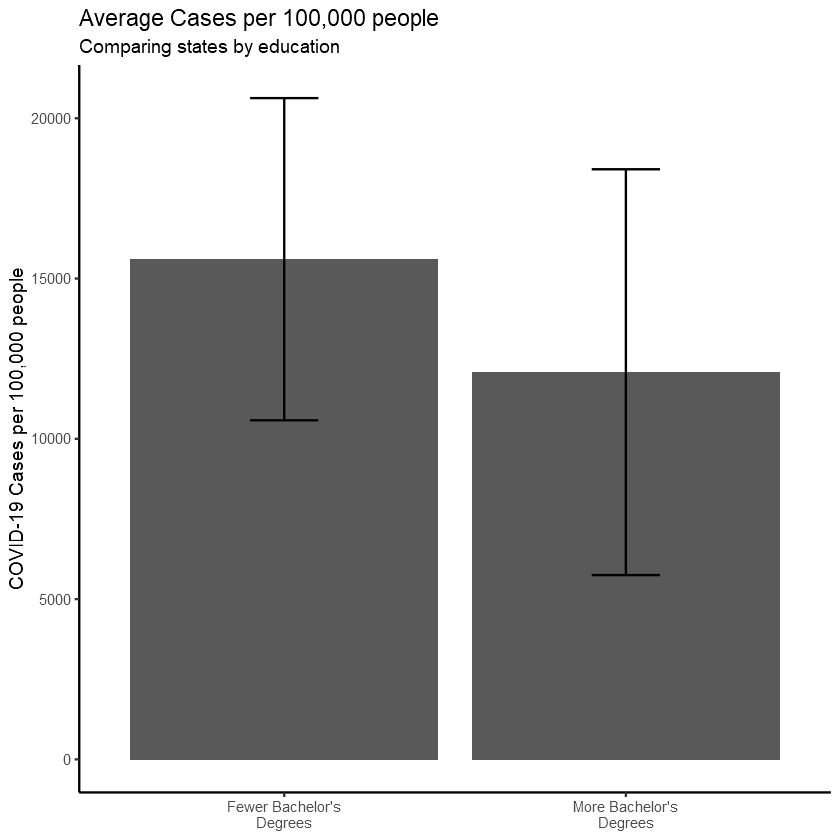

In [26]:
bar_edu = 
ggplot() +
geom_col(data = covid_bystate_summarized,
         aes(x = factor(top_half_edu), y = average_cases_per_100000)) +
geom_errorbar(data =  covid_bystate_summarized,
              aes(x = factor(top_half_edu),
                  ymin = average_cases_per_100000 - (2*sd_cases_per_100000),
                  ymax = average_cases_per_100000 + (2*sd_cases_per_100000)),
              width = 0.2) +
scale_x_discrete(labels = c("Fewer Bachelor\'s\nDegrees", "More Bachelor\'s\nDegrees")) + 
labs(title = "Average Cases per 100,000 people",
     subtitle = "Comparing states by education",
     x = NULL,
     y = "COVID-19 Cases per 100,000 people") +
theme_classic()

bar_edu

In [27]:
### equivalent to the top
ggplot() +
geom_bar(data = covid_bystate_summarized,
         aes(x = factor(top_half_edu), y = average_cases_per_100000),
         stat = "identity") +
geom_errorbar(data =  covid_bystate_summarized,
              aes(x = factor(top_half_edu),
                  ymin = average_cases_per_100000 - (2*sd_cases_per_100000),
                  ymax = average_cases_per_100000 + (2*sd_cases_per_100000)),
              width = 0.2) +
scale_x_discrete(labels = c("Fewer Bachelor\'s\nDegrees", "More Bachelor\'s\nDegrees")) + 
labs(title = "Average Cases per 100,000 people",
     subtitle = "Comparing states by education",
     x = NULL,
     y = "COVID-19 Cases per 100,000 people") +
theme_classic()

#### Histograms

Rather than defining our own bar heights, histograms are meant to count the frequency of a discrete case. Now, we do not consider average number of cases per 100,000 people to be a discrete variable. However, what we can do is define discrete bins of values and see how many states appear in each bin. For histograms, changing the size of the binwidth is important. It helps define what your output will look like.

* Data: covid_bystate
* Variables: cases_per_100000

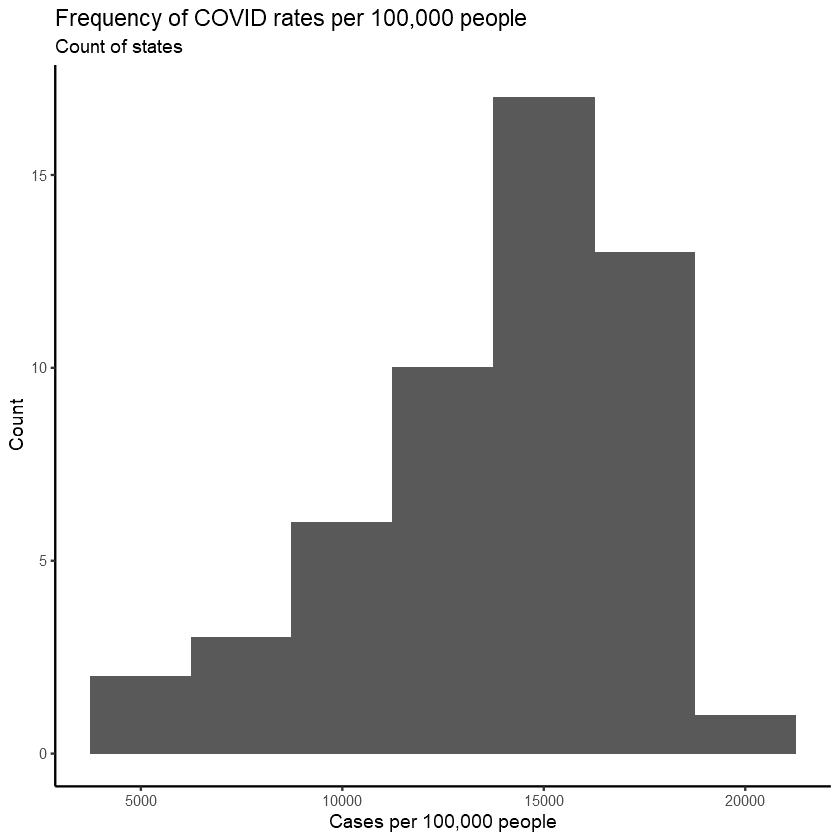

In [28]:
histogram_plot = 
ggplot() +
geom_histogram(data = covid_bystate,
               aes(x = cases_per_100000),
               binwidth = 2500) + # changing binwidth is key
labs(title = "Frequency of COVID rates per 100,000 people",
     subtitle = "Count of states",
     x = "Cases per 100,000 people",
     y = "Count") +
theme_classic()

histogram_plot

#### Density plots

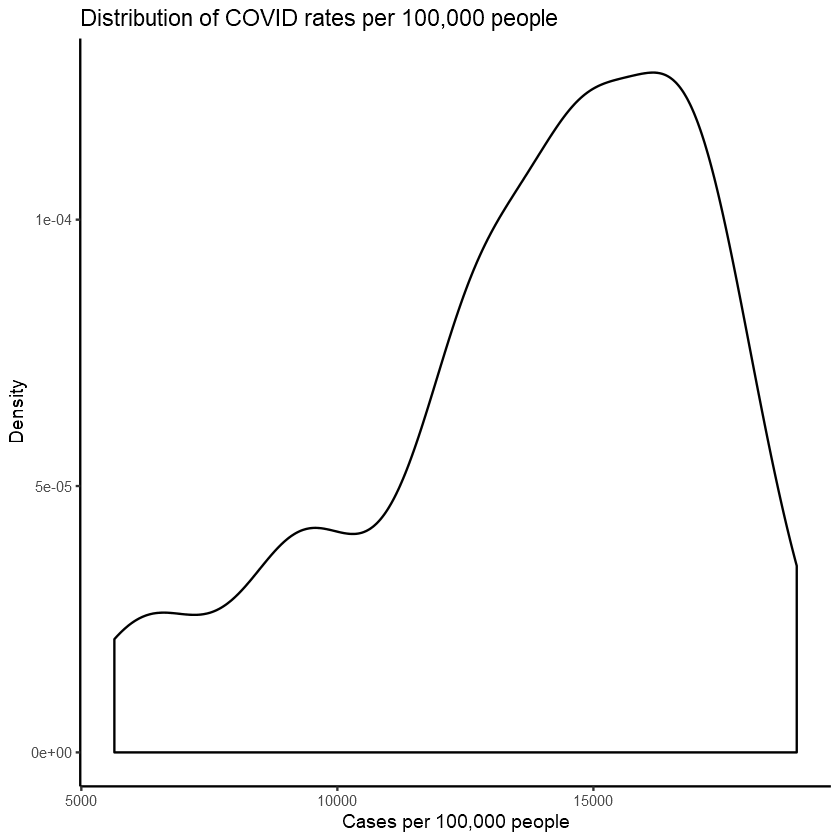

In [29]:
density_plot = 
ggplot() +
geom_density(data = covid_bystate, aes(cases_per_100000), bw = 1000) +
labs(title = "Distribution of COVID rates per 100,000 people",
     x = "Cases per 100,000 people",
     y = "Density") +
theme_classic()

density_plot

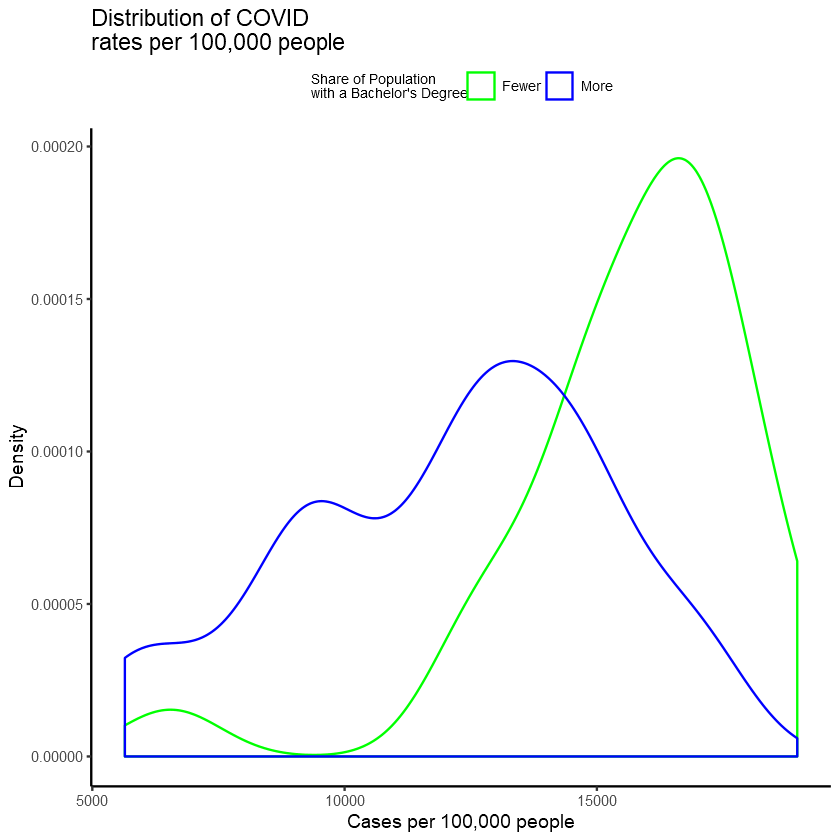

In [30]:
density_edu = 
ggplot() +
geom_density(data = covid_bystate, aes(cases_per_100000, color = factor(top_half_edu)), bw = 1000) +
labs(title = "Distribution of COVID\nrates per 100,000 people",
     x = "Cases per 100,000 people",
     y = "Density") +
theme_classic() +
scale_colour_manual(values = c("0" = "green", "1" = "blue"),
                    labels = c("Fewer", "More")) +
labs(color = "Share of Population\nwith a Bachelor's Degree  ") +
theme(legend.position = "top",
      legend.text=element_text(size=8),
      legend.title=element_text(size=8))

density_edu

#### Combing plots

In [31]:
ggarrange(box_edu, bar_edu,
          density_edu, cases_over_time,
          ncol = 2, nrow = 2)

## Spatial plots

In [32]:
### set working directory to the folder containing shapefile and other supporting files
setwd("G:/My Drive/Desktop Laptop Shared Files/ggplot2 seminar/data_files/states_shp")
# dsn is for the "destination" folder
# by putting "." we are saying we want to look at the current working directory
states_spdf = readOGR(dsn = ".", layer = "states")

class(states_spdf)

OGR data source with driver: ESRI Shapefile 
Source: "G:\My Drive\Desktop Laptop Shared Files\ggplot2 seminar\data_files\states_shp", layer: "states"
with 51 features
It has 5 fields


[1] "SpatialPolygonsDataFrame"
attr(,"package")
[1] "sp"

<span style="color:red"><b>A note on the 'states_spdf' object</span>.</b>

We've just read in a Shapefile which is typically used to upload maps into GIS. We use the readOGR() function to read in the file and assign it to 'states_spdf.' Now, the class of the object is important. 'states_spdf' is a SpatialPolygonsDataFrame as indicated by the class() function (hence the 'spdf' at the end of the variable name). It has several 'slots' which contain more objects. To see the names of the slots we use the slotNames() function to view the objects within 'states_sp.' <br>
<br>
To access the slot, we use the '@' symbol just like we would use '$' with a data frame to reference a specific column. This is coded just after we use slotNames().

In [33]:
### see the slots in states_spdf
slotNames(states_spdf)

### accessing the slots
states_spdf_data = states_spdf@data
head(states_spdf_data)

### while we're at it, let's add those row.names as a column to be used later
### this is how we match the correct columns when we use the merge() function
states_spdf@data$id = row.names(states_spdf@data)
# head(states_spdf@data)

[1] "data"        "polygons"    "plotOrder"   "bbox"        "proj4string"

STATE_NAME   DRAWSEQ STATE_FIPS SUB_REGION         STATE_ABBR
0 Washington   2       53         Pacific            WA        
1 Montana      3       30         Mountain           MT        
2 Maine        4       23         New England        ME        
3 North Dakota 5       38         West North Central ND        
4 South Dakota 6       46         West North Central SD        
5 Wyoming      7       56         Mountain           WY

#### Merging our ACS and COVID data with the states data

While we're at it, lets merge all our data together.

In [34]:
states_spdf@data = merge(x = states_spdf@data, by.x = "STATE_FIPS", all.x = T,
                         y = covid_bystate, by.y = "state_fips", all.y = F)

names(states_spdf@data)
head(states_spdf@data)
tail(states_spdf@data)

[1] "STATE_FIPS"          "STATE_NAME"          "DRAWSEQ"            
 [4] "SUB_REGION"          "STATE_ABBR"          "id"                 
 [7] "state"               "cases"               "deaths"             
[10] "pop_total"           "pop_white"           "edu_total"          
[13] "edu_hs"              "edu_ged"             "edu_bachelors"      
[16] "edu_masters"         "edu_profschool"      "edu_phd"            
[19] "income_per_capita"   "pop_wo_healthcare"   "percent_minority"   
[22] "top_half_minority"   "percent_bachelors"   "top_half_edu"       
[25] "percent_healthcare"  "top_half_healthcare" "cases_per_100000"   
[28] "deaths_per_100000"

STATE_FIPS STATE_NAME DRAWSEQ SUB_REGION         STATE_ABBR id state     
1 1          Alabama    43      East South Central AL         41 Alabama   
2 2          Alaska     51      Pacific            AK         49 Alaska    
3 4          Arizona    37      Mountain           AZ         35 Arizona   
4 5          Arkansas   47      West South Central AR         45 Arkansas  
5 6          California 25      Pacific            CA         23 California
6 8          Colorado   32      Mountain           CO         30 Colorado  
  cases   deaths pop_total ... income_per_capita pop_wo_healthcare
1  817054 15320   4876250  ... 27928              457826          
2  131547   674    737068  ... 36787               97156          
3 1142122 20776   7050299  ... 30694              723547          
4  508937  8237   2999370  ... 26577              250631          
5 4860797 71369  39283497  ... 36955             2915070          
6  721073  8174   5610349  ... 38226              420782          
  percent_minority top_half_minority percent_bachelors top_half_edu
1 31.90983         1                 25.46833          0           
2 35.41776         1                 29.55121          0           
3 22.77699         1                 29.46681          0           
4 23.28242         1                 23.02779          0           
5 40.29752         1                 33.92596          1           
6 16.00212         0                 40.91234          1           
  percent_healthcare top_half_healthcare cases_per_100000 deaths_per_100000
1 90.61110           0                   16755.79         314.17585        
2 86.81858           0                   17847.34          91.44339        
3 89.73736           0                   16199.63         294.68254        
4 91.64388           0                   16968.13         274.62434        
5 92.57940           1                   12373.64         181.67680        
6 92.49990           1                   12852.55         145.69504

STATE_FIPS STATE_NAME    DRAWSEQ SUB_REGION         STATE_ABBR id
46 50         Vermont       10      New England        VT         8 
47 51         Virginia      35      South Atlantic     VA         33
48 53         Washington     2      Pacific            WA         0 
49 54         West Virginia 30      South Atlantic     WV         28
50 55         Wisconsin      8      East North Central WI         6 
51 56         Wyoming        7      Mountain           WY         5 
   state         cases  deaths pop_total ... income_per_capita
46 Vermont        38090   351   624313   ... 34577            
47 Virginia      913100 13624  8454463   ... 39278            
48 Washington    710571  8475  7404107   ... 38915            
49 West Virginia 264002  4238  1817305   ... 26480            
50 Wisconsin     865319  9226  5790716   ... 33375            
51 Wyoming        99662  1149   581024   ... 33366            
   pop_wo_healthcare percent_minority top_half_minority percent_bachelors
46  24644             5.835214        0                 38.02457         
47 707960            32.371612        1                 38.78145         
48 457854            24.621187        1                 36.02014         
49 108019             6.917111        0                 20.61461         
50 310259            14.570823        0                 30.11673         
51  65354             8.557306        0                 27.36252         
   top_half_edu percent_healthcare top_half_healthcare cases_per_100000
46 1            96.05262           1                    6101.106       
47 1            91.62620           0                   10800.213       
48 1            93.81622           1                    9596.984       
49 0            94.05609           1                   14527.116       
50 0            94.64213           1                   14943.213       
51 0            88.75193           0                   17152.820       
   deaths_per_100000
46  56.2218         
47 161.1457         
48 114.4635         
49 233.2025         
50 159.3240         
51 197.7543

#### A simple map of the United States

In the code below, we map out the United States. I created this shapefile so that Alaska and Hawaii appear in a different location than they do geographically. It's much easier to view it this way as we do not have to zoom out to view all the states. It's important to understand each input to the ggplot2 functions. For spatial maps, they're identical to the previous plots with a few nuances.

* Data: states_spdf
* Variables: long, lat, group

In [35]:
ggplot() + 
geom_polygon(data = states_spdf,
             aes(x = long, y = lat, group = group),
             fill='white', color = "black") + 
coord_fixed(1.25)

Regions defined for each Polygons


<span style="color:red"><b>Another note on the 'states_spdf' object</span>.</b>

While we can use this to create a simple map of the United States, we can convert the SpatialPolygonsDataFrame object into a simple data.frame class by using the code below. 

In [36]:
### fortify is a function in ggplot2 which transforms the information in the
### SpatialPolygonsDataFrame object into a simple data frame
states_fortified = fortify(states_spdf)
head(states_fortified)

### notice how this new data frame does not contain much information
### it only contains information on how to draw the polygons
### we will now merge the data from 'states_spdf' with the new data frame

Regions defined for each Polygons


long      lat      order hole  piece id group
1 -122.4020 48.22522 1     FALSE 1     0  0.1  
2 -122.4629 48.22836 2     FALSE 1     0  0.1  
3 -122.4544 48.12849 3     FALSE 1     0  0.1  
4 -122.3613 48.06010 4     FALSE 1     0  0.1  
5 -122.5145 48.13397 5     FALSE 1     0  0.1  
6 -122.5421 48.21046 6     FALSE 1     0  0.1

In [39]:
ggplot() + 
geom_polygon(data = states_fortified, aes(x = long, y = lat, group = group), fill = "white", color = "black") +
coord_fixed(1.25)

In [40]:
### merging of data
### here we use the reference column "id" which we created earlier
### to match the correct rows
states_map = merge(x = states_fortified, by.x = "id",
                   y = states_spdf@data, by.y = "id")

head(states_map)

id long      lat      order hole  piece group STATE_FIPS STATE_NAME DRAWSEQ
1 0  -122.4020 48.22522 1     FALSE 1     0.1   53         Washington 2      
2 0  -122.4629 48.22836 2     FALSE 1     0.1   53         Washington 2      
3 0  -122.4544 48.12849 3     FALSE 1     0.1   53         Washington 2      
4 0  -122.3613 48.06010 4     FALSE 1     0.1   53         Washington 2      
5 0  -122.5145 48.13397 5     FALSE 1     0.1   53         Washington 2      
6 0  -122.5421 48.21046 6     FALSE 1     0.1   53         Washington 2      
  ... income_per_capita pop_wo_healthcare percent_minority top_half_minority
1 ... 38915             457854            24.62119         1                
2 ... 38915             457854            24.62119         1                
3 ... 38915             457854            24.62119         1                
4 ... 38915             457854            24.62119         1                
5 ... 38915             457854            24.62119         1                
6 ... 38915             457854            24.62119         1                
  percent_bachelors top_half_edu percent_healthcare top_half_healthcare
1 36.02014          1            93.81622           1                  
2 36.02014          1            93.81622           1                  
3 36.02014          1            93.81622           1                  
4 36.02014          1            93.81622           1                  
5 36.02014          1            93.81622           1                  
6 36.02014          1            93.81622           1                  
  cases_per_100000 deaths_per_100000
1 9596.984         114.4635         
2 9596.984         114.4635         
3 9596.984         114.4635         
4 9596.984         114.4635         
5 9596.984         114.4635         
6 9596.984         114.4635

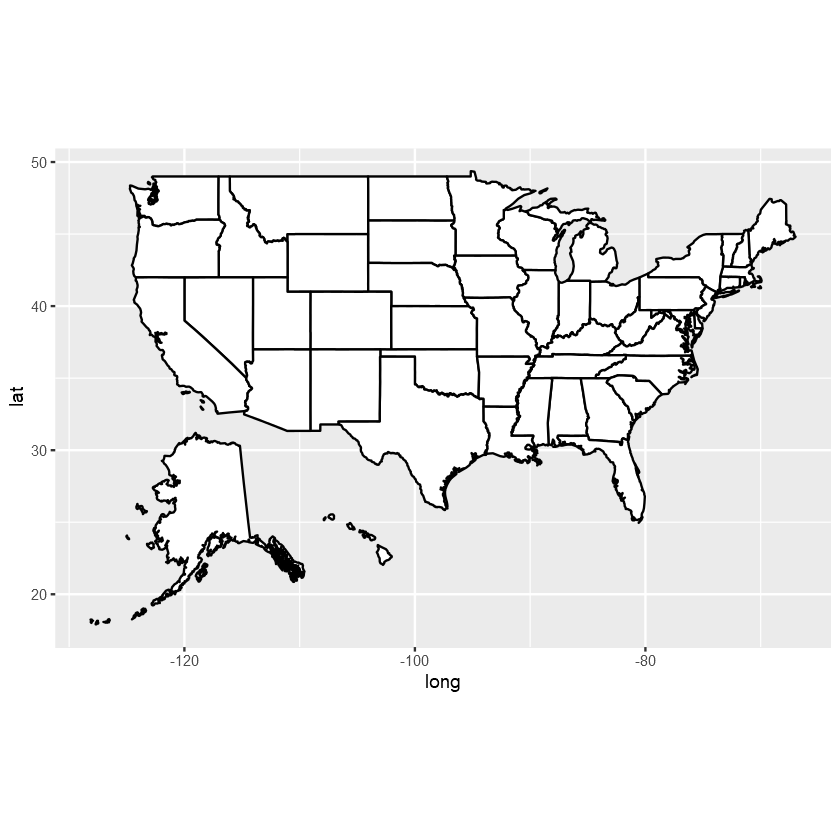

In [41]:
### we can repeat the steps earlier with our new object to map out the USA
### the only piece of code that needs to change is the data which we are feeding it
ggplot(data = states_map) + 
geom_polygon(aes(x = long, y = lat, group = group), fill='white', color = "black") + 
coord_fixed(1.25)

#### Changing the map to show COVID infections per 100,000 of population

To show how COVID rates per 100,000 people look like in the US, we will change the 'fill' parameter in aes(). Because we want make the color of the fill a function of cases_per_1000000, we will reference that variable. In ggplot2 there are a lot of prebuilt themes and palettes one can choose from. scale_fill_distiller() is for continuous variables that define fill.

* Data: states_map
* Variables: long, lat, group, cases_per_100000

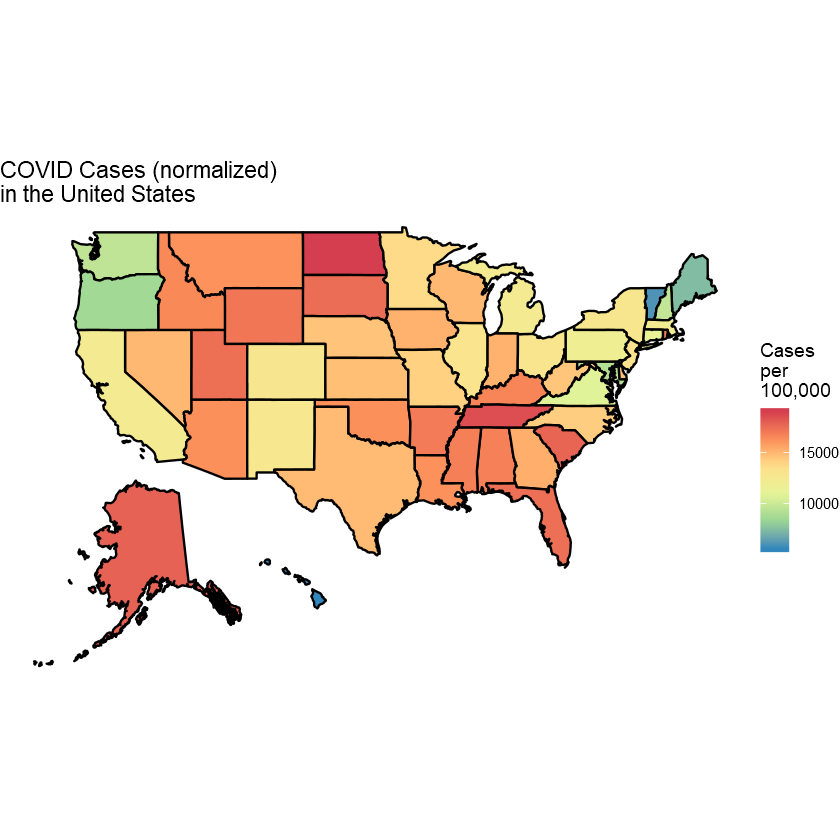

In [42]:
### we can repeat the steps earlier with our new object to map out the USA
### the only piece of code that needs to change is the data which we are feeding it
map_covid = 
ggplot() + 
geom_polygon(data = states_map,
             aes(x = long, y = lat, group = group, fill = cases_per_100000),
             color = "black") + 
coord_fixed(1.25) +
theme_void() +
scale_fill_distiller(palette = "Spectral") +
labs(title = "COVID Cases (normalized)\nin the United States",
     fill = "Cases\nper\n100,000")


map_covid

#### Lets spatially map out education in the United States

In [43]:
names(states_map)

[1] "id"                  "long"                "lat"                
 [4] "order"               "hole"                "piece"              
 [7] "group"               "STATE_FIPS"          "STATE_NAME"         
[10] "DRAWSEQ"             "SUB_REGION"          "STATE_ABBR"         
[13] "state"               "cases"               "deaths"             
[16] "pop_total"           "pop_white"           "edu_total"          
[19] "edu_hs"              "edu_ged"             "edu_bachelors"      
[22] "edu_masters"         "edu_profschool"      "edu_phd"            
[25] "income_per_capita"   "pop_wo_healthcare"   "percent_minority"   
[28] "top_half_minority"   "percent_bachelors"   "top_half_edu"       
[31] "percent_healthcare"  "top_half_healthcare" "cases_per_100000"   
[34] "deaths_per_100000"

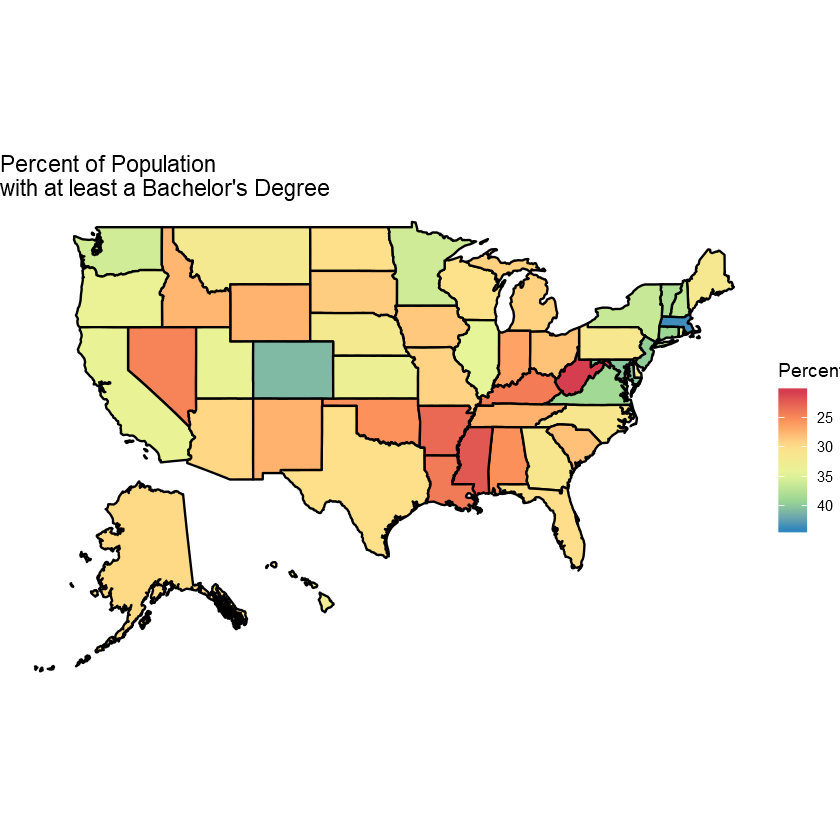

In [44]:
states_map$percent_bachelors[which(states_map$percent_bachelors > 50)] = 44

map_edu = (ggplot() + 
           geom_polygon(data = states_map,
                        aes(x = long, y = lat, group = group, fill = percent_bachelors),
                        color = "black") + 
           coord_fixed(1.25) +
           theme_void() +
           scale_fill_distiller(palette = "Spectral", trans = "reverse") +
           labs(title = "Percent of Population\nwith at least a Bachelor's Degree",
                fill = "Percent")
           )

map_edu

#### Let's combine some of our plots together!

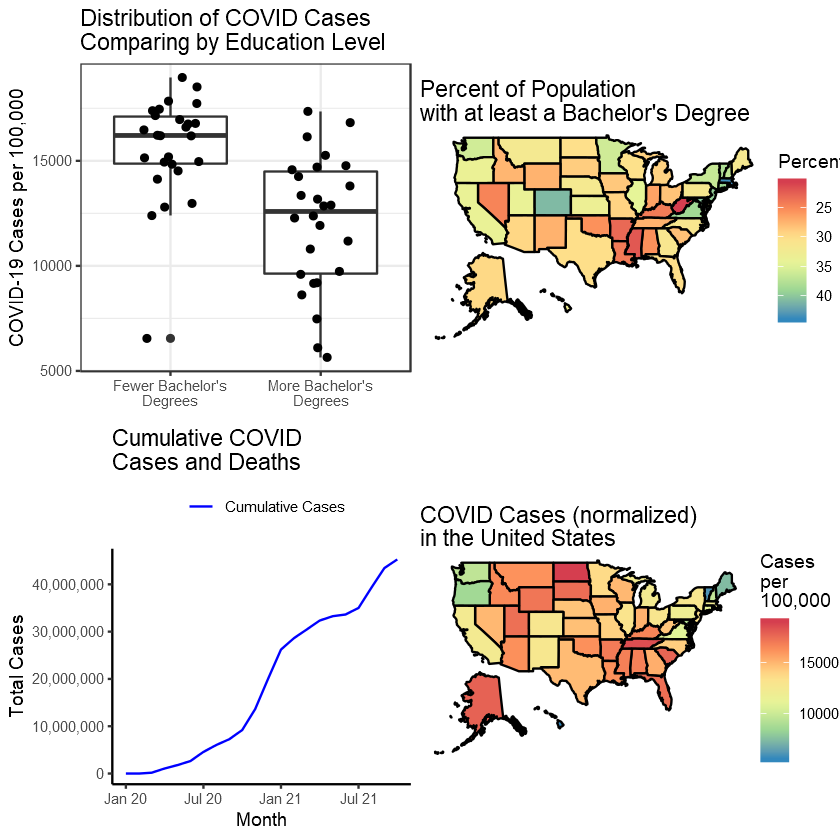

In [45]:
ggarrange(box_edu, map_edu, cases_over_time, map_covid, ncol = 2, nrow = 2)

## Animating the spatial plots for COVID cases over time

For the sake of time, I've went ahead and created the data frame which we will be using to create our animated map showing COVID cases through time. I've included the code I need to get that data. You can skip it and just load the file I've written myself.

#### Getting the correct data frame

In [46]:
states_fortified_temp = merge(states_fortified,
                              states_spdf@data[, c("id", "STATE_FIPS")],
                              by = "id")

In [47]:
states_map_bymonth = merge(x = covid_bystate_bymonth, by.x = "fips",
                           y = states_fortified_temp, by.y = "STATE_FIPS")

states_map_bymonth = states_map_bymonth[with(states_map_bymonth, order(months_after_jan20, id, order)), ]

setwd("G:/My Drive/Desktop Laptop Shared Files/ggplot2 seminar/data_files/processed_data")
write.csv(states_map_bymonth, "states_map_bymonth.csv", row.names = F)

####  The actual plotting

When we are animating our plots, we are essentially telling R to create gif using multiple plots in a flipbook. The only difference between plotting a single map and making an animation is the reference data and a line of code indicating which variable tracks the sequence of frames. We will first define our map, then in later code we will animate and save it as a gif. You must have the package 'gifski' installed to do this.

* Data: states_map_bymonth
* Variables: lat, long, group, cases_per_100000, months_after_jan20

In [48]:
setwd("G:/My Drive/Desktop Laptop Shared Files/ggplot2 seminar/data_files/processed_data")
states_map_bymonth = read.csv("states_map_bymonth.csv")

In [49]:
map_covid_bymonth = 
ggplot() + 
geom_polygon(data = states_map_bymonth, # we had to change the data source
          aes(x = long, y = lat, group = group, fill = cases_per_100000),
          color = "black") + 
coord_fixed(1.25) +
theme_void() +
scale_fill_distiller(palette = "Spectral") +
labs(title = "COVID Cases (normalized)\nin the United States",
     fill = "Cases\nper\n100,000") +
transition_states(months_after_jan20) # our few lines of new code! it's all we need

In [50]:
setwd("C:/Users/Jason/Desktop")

### this is how we animate it, it basically takes a bunch of plots and puts them together into a gif
### we must have the package 'gifski' to
animate(map_covid_bymonth, end_pause = 20, width = 600, height = 600, renderer = gifski_renderer())
anim_save("the_gif.gif")

### fin

Code written by: Jason Malinay Soria <br>
Date: 2021-10-25